# Day 5: Decision Trees and Random Forests
**Objective:** Learn tree-based models for classification & regression.
**Tools:** Scikit-learn, Graphviz

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
df = pd.read_csv("../data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9707792207792207


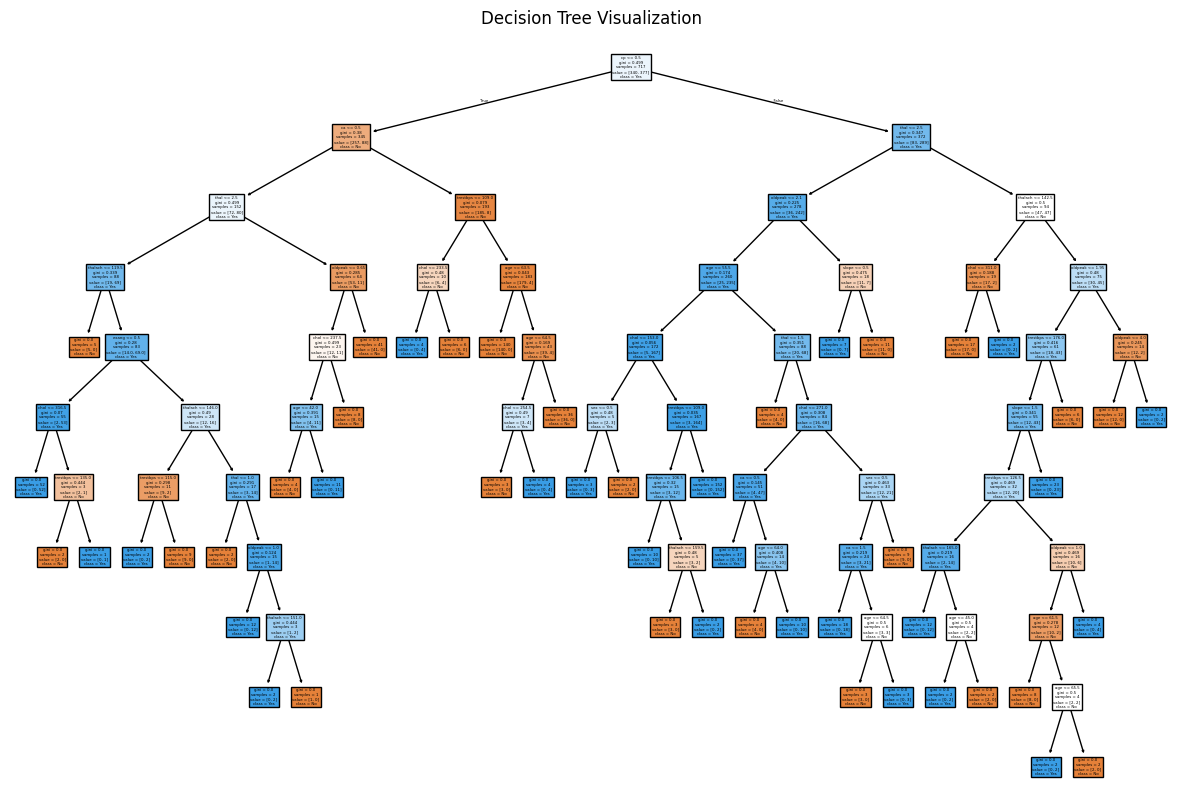

In [9]:
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()


In [10]:
for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    acc = accuracy_score(y_test, dt.predict(X_test))
    print(f"Max Depth = {depth}, Accuracy = {acc:.3f}")


Max Depth = 1, Accuracy = 0.756
Max Depth = 2, Accuracy = 0.701
Max Depth = 3, Accuracy = 0.805
Max Depth = 4, Accuracy = 0.834
Max Depth = 5, Accuracy = 0.844
Max Depth = 6, Accuracy = 0.886
Max Depth = 7, Accuracy = 0.925
Max Depth = 8, Accuracy = 0.955
Max Depth = 9, Accuracy = 0.964
Max Depth = 10, Accuracy = 0.971


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9805194805194806


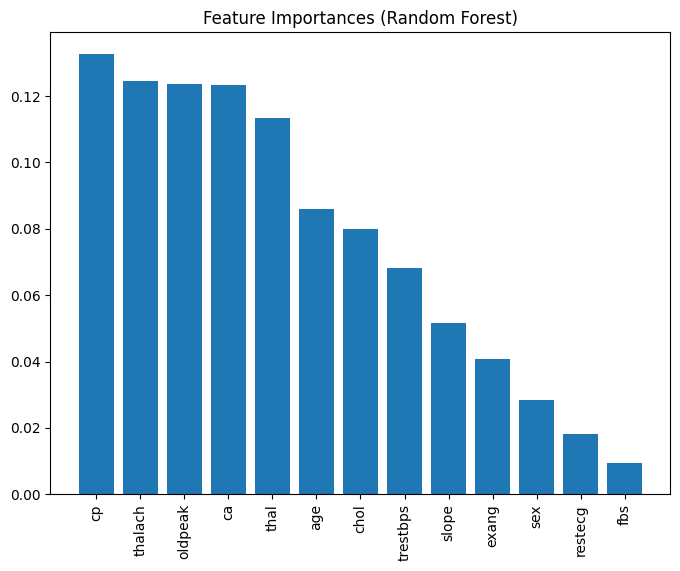

In [12]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [13]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


Cross-Validation Accuracy: 1.00 ± 0.01
